In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [22]:
# 数据集文件路径
file_paths = [
    'C:\\Users\\mjy\\Desktop\\new_program\\PAST_1.csv',
    'C:\\Users\\mjy\\Desktop\\new_program\\PAST_3.csv',
    'C:\\Users\\mjy\\Desktop\\new_program\\PAST_7.csv',
    'C:\\Users\\mjy\\Desktop\\new_program\\PAST_15.csv'
]

# 标签列名
label_columns = ['未来1日涨幅', '未来3日涨幅', '未来7日涨幅', '未来15日涨幅', '未来30日涨幅']

# 存储准确率
accuracies = {label: [] for label in label_columns}

In [23]:
# 遍历每个数据集
for file_path in file_paths:

    print(file_path)
    
    # 读取数据
    data = pd.read_csv(file_path)
    data = data.dropna()

    # 特征和标签
    features = data.iloc[:, 1:192]  # n1-n47, p1-p146
    labels = {label: (data[label] > 0).astype(int) for label in label_columns}

    # 标准化
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # 对每个标签进行训练和评估
    for label_name, label_data in labels.items():

        print(label_name)
        
        X_train, X_test, y_train, y_test = train_test_split(features_scaled, label_data, test_size=0.2, random_state=42)

        # 创建SVM模型
        model = SVC(kernel='rbf', C=1.0, gamma='scale')

        # 训练模型
        model.fit(X_train, y_train)

        # 预测并评估
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[label_name].append(accuracy)

C:\Users\mjy\Desktop\new_program\PAST_1.csv
未来1日涨幅
未来3日涨幅
未来7日涨幅
未来15日涨幅
未来30日涨幅
C:\Users\mjy\Desktop\new_program\PAST_3.csv
未来1日涨幅
未来3日涨幅
未来7日涨幅
未来15日涨幅
未来30日涨幅
C:\Users\mjy\Desktop\new_program\PAST_7.csv
未来1日涨幅
未来3日涨幅
未来7日涨幅
未来15日涨幅
未来30日涨幅
C:\Users\mjy\Desktop\new_program\PAST_15.csv
未来1日涨幅
未来3日涨幅
未来7日涨幅
未来15日涨幅
未来30日涨幅


In [24]:
# 打印每个数据集的准确率
for label_name, accuracy_list in accuracies.items():
    # 只保留最后n个数据
    trimmed_accuracy_list = accuracy_list[-5:]
    for i, acc in enumerate(trimmed_accuracy_list):
        print(f'{file_paths[i]} - {label_name} prediction accuracy: {acc}')

C:\Users\mjy\Desktop\new_program\PAST_1.csv - 未来1日涨幅 prediction accuracy: 0.5223880597014925
C:\Users\mjy\Desktop\new_program\PAST_3.csv - 未来1日涨幅 prediction accuracy: 0.5970149253731343
C:\Users\mjy\Desktop\new_program\PAST_7.csv - 未来1日涨幅 prediction accuracy: 0.5862068965517241
C:\Users\mjy\Desktop\new_program\PAST_15.csv - 未来1日涨幅 prediction accuracy: 0.7142857142857143
C:\Users\mjy\Desktop\new_program\PAST_1.csv - 未来3日涨幅 prediction accuracy: 0.4577114427860697
C:\Users\mjy\Desktop\new_program\PAST_3.csv - 未来3日涨幅 prediction accuracy: 0.5522388059701493
C:\Users\mjy\Desktop\new_program\PAST_7.csv - 未来3日涨幅 prediction accuracy: 0.3793103448275862
C:\Users\mjy\Desktop\new_program\PAST_15.csv - 未来3日涨幅 prediction accuracy: 0.6428571428571429
C:\Users\mjy\Desktop\new_program\PAST_1.csv - 未来7日涨幅 prediction accuracy: 0.527363184079602
C:\Users\mjy\Desktop\new_program\PAST_3.csv - 未来7日涨幅 prediction accuracy: 0.6567164179104478
C:\Users\mjy\Desktop\new_program\PAST_7.csv - 未来7日涨幅 prediction accur

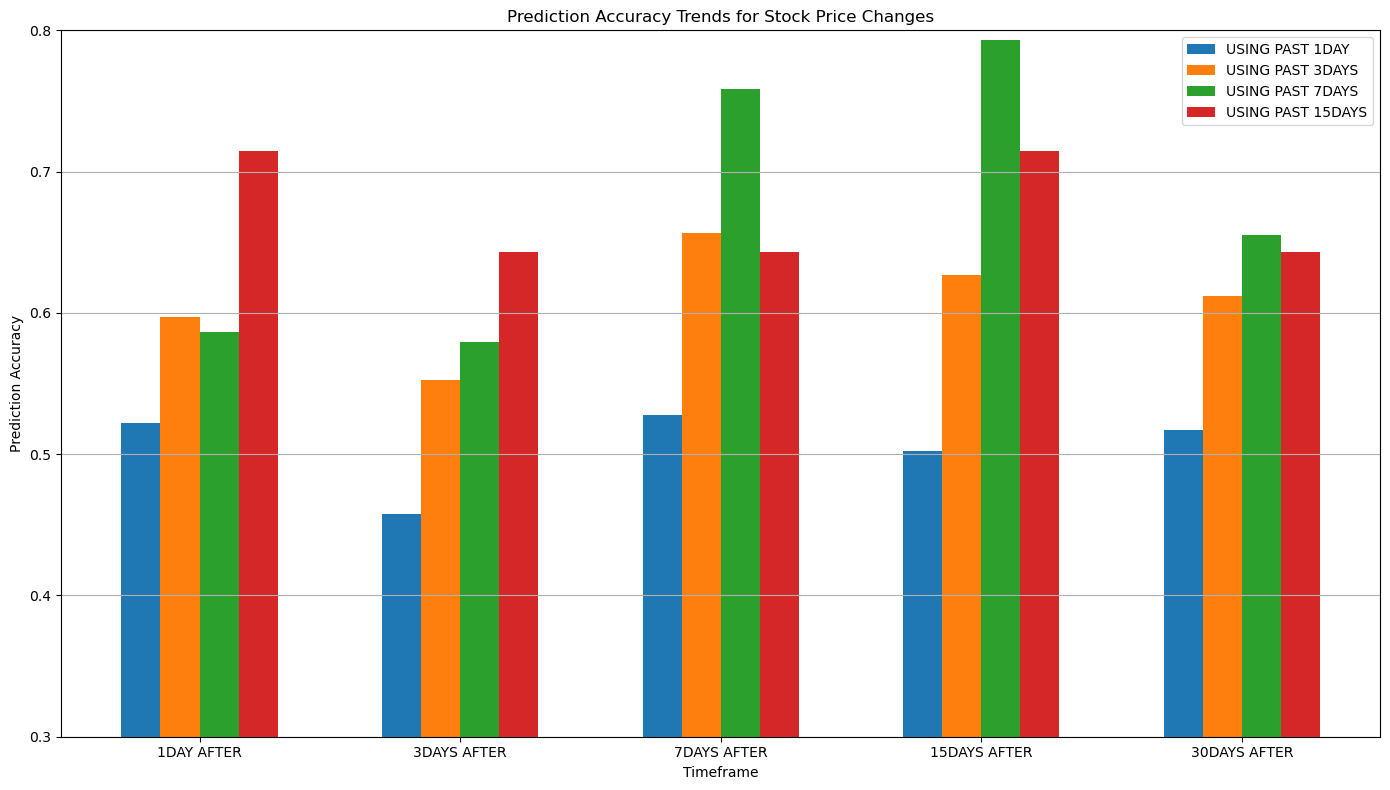

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 数据准备
data = {
    'Timeframe': ['1DAY AFTER', '3DAYS AFTER', '7DAYS AFTER', '15DAYS AFTER', '30DAYS AFTER'],
    'USING PAST 1DAY': [0.5224, 0.4577, 0.5274, 0.5025, 0.5174],
    'USING PAST 3DAYS': [0.5970, 0.5522, 0.6567, 0.6269, 0.6119],
    'USING PAST 7DAYS': [0.5862, 0.5793, 0.7586, 0.7931, 0.6552],
    'USING PAST 15DAYS': [0.7143, 0.6429, 0.6429, 0.7143, 0.6429]
}

# 创建数据框
df = pd.DataFrame(data)

# 绘制图形
plt.figure(figsize=(14, 8))

# 设置柱状图的宽度和位置
bar_width = 0.15
index = np.arange(len(df['Timeframe']))

# 绘制每个组的柱状图
for i, column in enumerate(df.columns[1:]):
    plt.bar(index + i * bar_width, df[column], bar_width, label=column)

# 添加图例和标签
plt.title('Prediction Accuracy Trends for Stock Price Changes')
plt.xlabel('Timeframe')
plt.ylabel('Prediction Accuracy')
plt.ylim(0.3, 0.8)  # 设置y轴范围以更好地展示准确率的变化
plt.xticks(index + bar_width * 1.5, df['Timeframe'])  # 设置x轴刻度
plt.legend()
plt.grid(axis='y')

# 显示图形
plt.tight_layout()
plt.show()

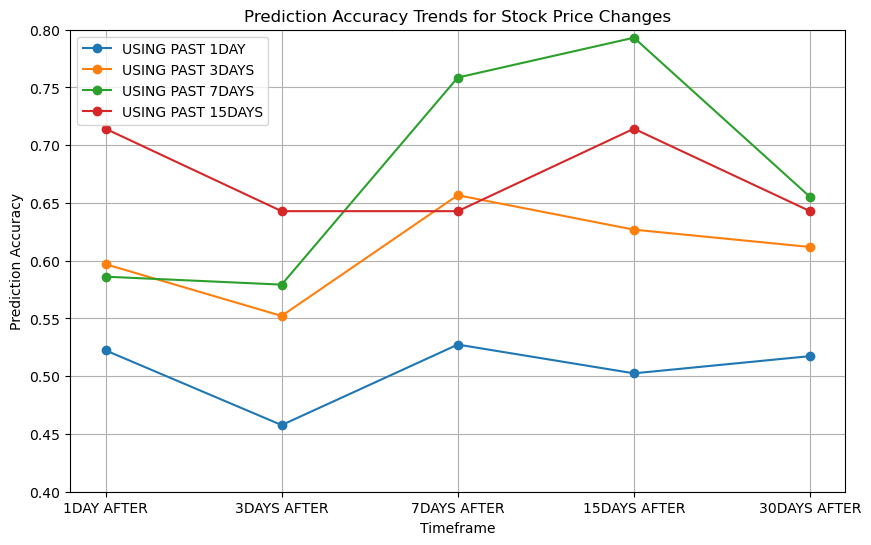

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# 数据
data = {
    'Timeframe': ['1DAY AFTER', '3DAYS AFTER', '7DAYS AFTER', '15DAYS AFTER', '30DAYS AFTER'],
    'USING PAST 1DAY': [0.5224, 0.4577, 0.5274, 0.5025, 0.5174],
    'USING PAST 3DAYS': [0.5970, 0.5522, 0.6567, 0.6269, 0.6119],
    'USING PAST 7DAYS': [0.5862, 0.5793, 0.7586, 0.7931, 0.6552],
    'USING PAST 15DAYS': [0.7143, 0.6429, 0.6429, 0.7143, 0.6429]
}

# 创建数据框
df = pd.DataFrame(data)

# 绘制图形
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df['Timeframe'], df[column], marker='o', label=column)

# 添加图例和标签
plt.title('Prediction Accuracy Trends for Stock Price Changes')
plt.xlabel('Timeframe')
plt.ylabel('Prediction Accuracy')
plt.ylim(0.4, 0.8)  # 设置y轴范围以更好地展示准确率的变化
plt.legend()
plt.grid(True)

# 显示图形
plt.show()